Data processing for energy transfer of Nate's dyes attached to silicon balls

In [98]:
# import libraries
import math
import scipy
import numpy as np
import matplotlib as mpl
import scipy.integrate as integrate
import matplotlib.colors as colors
import matplotlib.cm as cmx
import pandas as pd


%matplotlib inline
import matplotlib.pyplot as plt

from scipy.interpolate import interp1d

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [99]:
#load absorption data, look at data initially in pandas
path_to_file = '/Users/Mike/Documents/Glass Balls/glass balls data/blue orange absorption.csv'
absorption_blue_orange_inspect = pd.read_csv(path_to_file)
absorption_blue_orange = np.genfromtxt('glass balls data/blue orange absorption.csv', delimiter=',')
wavelength_b_o = absorption_blue_orange[3:,0]
absorption_b_o_ratios = absorption_blue_orange[3:,6:-2]
#absorption_ratio_blue_orange = absorption_blue_orange.iloc[2:,6:-2]

In [100]:
a =absorption_b_o_ratios
ratios = ['1:1','1:2','1:5','1:10','1:20','1:50']

In [101]:
absorption_blue_orange_inspect

,Unnamed: 0,blank,blue,orange,b,o,1,2,5,10,20,50,100,3
0,Unfunctionalised_Silicon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Wavelength (nm),Abs,NaN,Abs,NaN,Abs,Abs,Abs,Abs,Abs,Abs,Abs,NaN,NaN
2,799.9750366,0.003750953358,NaN,-0.01891047321,NaN,0.05384619907,0.1049700007,0.0629543215,0.07510720193,0.06549151987,0.03643084317,0.05778354779,NaN,NaN
3,799.001709,0.003079961985,NaN,-0.01884107664,NaN,0.05307951942,0.1048221812,0.06308693439,0.07520054281,0.06595161557,0.03636657819,0.05775152519,NaN,NaN
4,798.0279541,0.003595806425,NaN,-0.0181965325,NaN,0.05390234664,0.105205521,0.06413507462,0.07628429681,0.06689750403,0.03775466606,0.05828865618,NaN,NaN
5,797.053894,0.003358559217,NaN,-0.01786317118,NaN,0.05412085354,0.1062233672,0.06407303363,0.07623822987,0.06695382297,0.03788838908,0.05843006819,NaN,NaN
6,795.9401245,0.003289538668,NaN,-0.01801453717,NaN,0.05389270559,0.1063750014,0.06382919103,0.07619260252,0.06649063528,0.0378732495,0.05830135569,NaN,NaN
7,794.96521,0.003430930432,NaN,-0.01800668985,NaN,0.05445304513,0.1065304577,0.06441517919,0.07641240209,0.06692793965,0.03765635565,0.05911999941,NaN,NaN
8,793.9899292,0.003542328253,NaN,-0.01808550768,NaN,0.05450020358,0.1064153165,0.06406360865,0.07713050395,0.06716827303,0.03734336048,0.05842808634,NaN,NaN
9,793.0142822,0.003626110964,NaN,-0.01825446822,NaN,0.0541033484,0.1070816964,0.06428777426,0.07675419003,0.06713563949,0.03739073128,0.05864067376,NaN,NaN


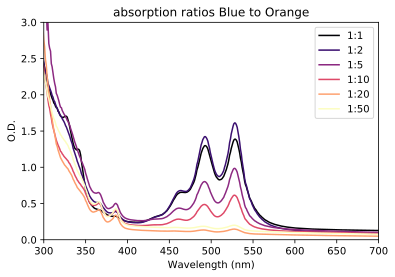

In [104]:
#plot absorption data
fig = plt.figure()
ax = fig.add_subplot(111)
# replace the next line 
#jet = colors.Colormap('jet')
# with

wavelength = wavelength_b_o
values = range(len(a[1,:]))

magma = cm = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=magma)
#print scalarMap.get_clim()

lines = []
for idx in range(len(a[1,:])):
    line = a[:,idx]
    colorVal = scalarMap.to_rgba(values[idx])
    colorText = (ratios[idx])
    retLine, = ax.plot(wavelength,line,
                       color=colorVal,
                       label=colorText)
    lines.append(retLine)
    

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('O.D.')
ax.set_title('absorption ratios Blue to Orange')
ax.set_xlim(300,700)
ax.set_ylim(0,3)
#added this to get the legend to work
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')
plt.show()

In [112]:
def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

In [117]:
processed_a = a/a[find_nearest_idx(wavelength,385),:]

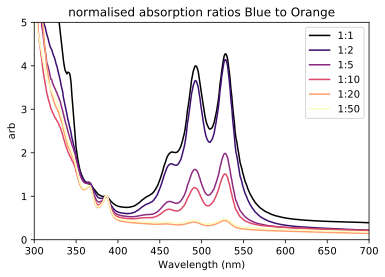

In [119]:
#plot absorption data
fig = plt.figure()
ax = fig.add_subplot(111)
# replace the next line 
#jet = colors.Colormap('jet')
# with
a = processed_a
wavelength = wavelength_b_o
values = range(len(a[1,:]))

magma = cm = plt.get_cmap('magma') 
cNorm  = colors.Normalize(vmin=0, vmax=values[-1])
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=magma)
#print scalarMap.get_clim()

lines = []
for idx in range(len(a[1,:])):
    line = a[:,idx]
    colorVal = scalarMap.to_rgba(values[idx])
    colorText = (ratios[idx])
    retLine, = ax.plot(wavelength,line,
                       color=colorVal,
                       label=colorText)
    lines.append(retLine)
    

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('arb')
ax.set_title('normalised absorption ratios Blue to Orange')
ax.set_xlim(300,700)
ax.set_ylim(0,5)
#added this to get the legend to work
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc='upper right')
plt.show()